In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read CSV
file_path = 'DataV2.csv'
df = pd.read_csv(file_path)

In [2]:
print(df.columns)
print(df.shape)

Index(['fW', 'current', 'ind', 'Rd', 'Cs', 'Rs', 'channel 0.1G attenuation',
       'channel 3.5G attenuation', 'channel 7G attenuation',
       'channel 14G attenuation', 'channel 28G attenuation', 'Stage 1 Region',
       'stage 1 0.1G attenuation', 'stage 2 0.1G attenuation',
       'Hard Constraint of neg2 on 0.1G Status', 'stage 1 3.5G attenuation',
       'stage 2 3.5G attenuation', 'stage 1 7G attenuation',
       'stage 2 7G attenuation', 'stage 1 14G attenuation',
       'stage 2 14G attenuation', 'stage 1 28G attenuation',
       'stage 2 28G attenuation', 'eye_maxHeight Vout_1 7G',
       'eye_maxWidth Vout_1 7G', 'eye_maxHeight Vout_2 7G',
       'eye_maxWidth Vout_2 7G', 'eye_maxWidth Vout_2 14G',
       'eye_maxWidth Vout_1 14G', 'eye_maxHeight Vout_2 14G',
       'eye_maxHeight Vout_1 14G', 'eye_maxWidth Vout_2 28G',
       'eye_maxWidth Vout_1 28G', 'eye_maxHeight Vout_1 28G',
       'eye_maxHeight Vout_2 28G', 'eye_maxHeight Vout_2 56G',
       'eye_maxWidth Vout_2 56G

In [3]:
print(df.isnull().sum())

fW                                        0
current                                   0
ind                                       0
Rd                                        0
Cs                                        0
Rs                                        0
channel 0.1G attenuation                  0
channel 3.5G attenuation                  0
channel 7G attenuation                    0
channel 14G attenuation                   0
channel 28G attenuation                   0
Stage 1 Region                            0
stage 1 0.1G attenuation                  0
stage 2 0.1G attenuation                  0
Hard Constraint of neg2 on 0.1G Status    0
stage 1 3.5G attenuation                  0
stage 2 3.5G attenuation                  0
stage 1 7G attenuation                    0
stage 2 7G attenuation                    0
stage 1 14G attenuation                   0
stage 2 14G attenuation                   0
stage 1 28G attenuation                   0
stage 2 28G attenuation         

In [4]:
# Show head
print(df.head())

         fW   current           ind      Rd            Cs      Rs  \
0  0.000006  0.000562  1.510000e-10   649.3  6.820000e-13  1431.0   
1  0.000009  0.002422  2.230000e-09  1415.0  2.090000e-14   270.0   
2  0.000007  0.001013  2.080000e-09   863.9  9.450000e-13   243.7   
3  0.000010  0.002243  1.730000e-09   518.5  3.510000e-13  1067.0   
4  0.000007  0.001158  2.370000e-09   332.5  9.840000e-14   650.5   

   channel 0.1G attenuation  channel 3.5G attenuation  channel 7G attenuation  \
0                  -0.01970                    -6.589                  -9.105   
1                  -0.02002                    -6.610                  -9.109   
2                  -0.01961                    -6.591                  -9.102   
3                  -0.01954                    -6.604                  -9.111   
4                  -0.01968                    -6.578                  -9.095   

   channel 14G attenuation  ...  eye_maxHeight Vout_2 14G  \
0                   -13.18  ...      

In [5]:
# Summary statistics for numeric columns
print(df.describe())

                 fW       current           ind            Rd            Cs  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  1.000000e+04   
mean       0.000005      0.001490  1.501958e-09    758.166793  4.984803e-13   
std        0.000003      0.000576  8.673524e-10    429.597786  2.879899e-13   
min        0.000001      0.000500  1.480000e-13     10.030000  1.010000e-15   
25%        0.000003      0.000992  7.537500e-10    387.600000  2.510000e-13   
50%        0.000005      0.001478  1.505000e-09    757.600000  4.990000e-13   
75%        0.000008      0.001986  2.250000e-09   1134.000000  7.480000e-13   
max        0.000010      0.002500  3.000000e-09   1500.000000  1.000000e-12   

                 Rs  channel 0.1G attenuation  channel 3.5G attenuation  \
count  10000.000000              10000.000000              10000.000000   
mean     760.992244                 -0.019672                 -6.587107   
std      429.003087                  0.000070                  

In [6]:
target_cols = [
    # Attenuation
    "stage 1 3.5G attenuation",
    "stage 2 3.5G attenuation",
    "stage 1 7G attenuation",
    "stage 2 7G attenuation",
    "stage 1 14G attenuation",
    "stage 2 14G attenuation",
    "stage 1 28G attenuation",
    "stage 2 28G attenuation",
    # Eye metrics - 7G
    "eye_maxHeight Vout_1 7G",
    "eye_maxWidth Vout_1 7G",
    "eye_maxHeight Vout_2 7G",
    "eye_maxWidth Vout_2 7G",
    # Eye metrics - 14G
    "eye_maxHeight Vout_1 14G",
    "eye_maxWidth Vout_1 14G",
    "eye_maxHeight Vout_2 14G",
    "eye_maxWidth Vout_2 14G",
    # Eye metrics - 28G
    "eye_maxHeight Vout_1 28G",
    "eye_maxWidth Vout_1 28G",
    "eye_maxHeight Vout_2 28G",
    "eye_maxWidth Vout_2 28G",
    # Eye metrics - 56G
    "eye_maxHeight Vout_1 56G",
    "eye_maxWidth Vout_1 56G",
    "eye_maxHeight Vout_2 56G",
    "eye_maxWidth Vout_2 56G",
]

In [7]:
feature_columns = [col for col in df.columns if col not in target_cols]

y = df[target_cols]

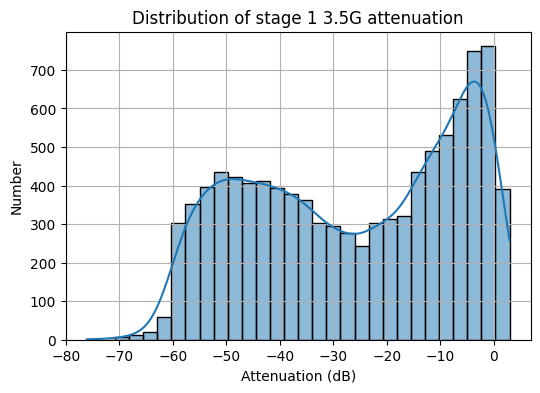

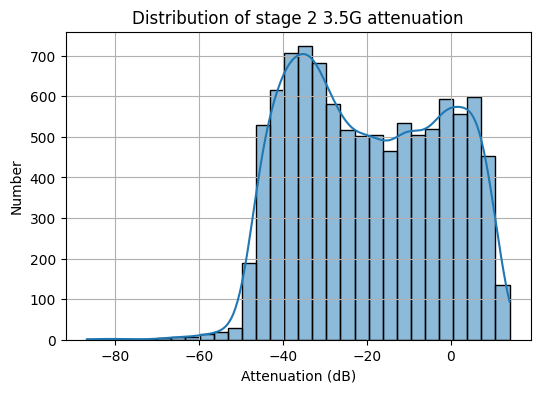

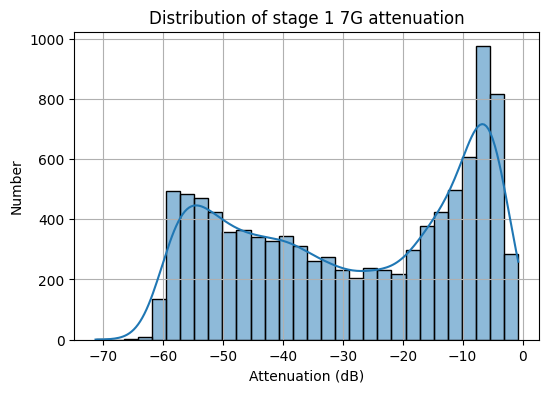

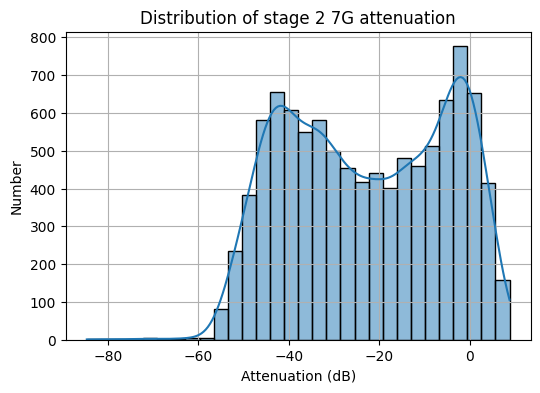

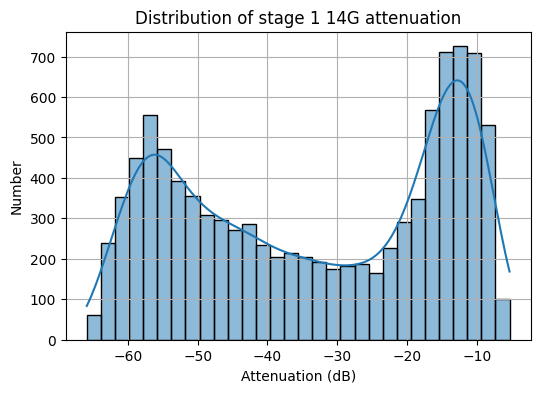

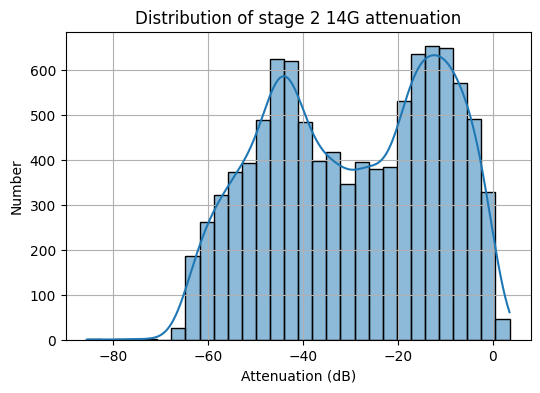

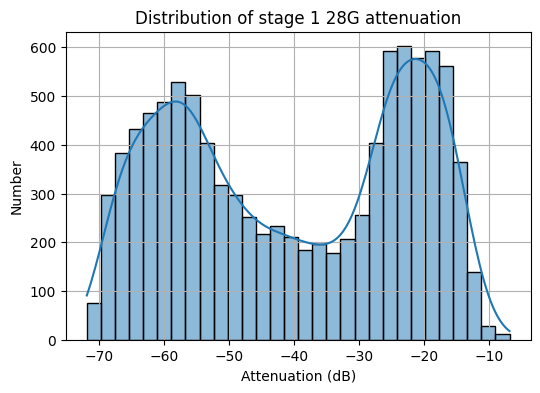

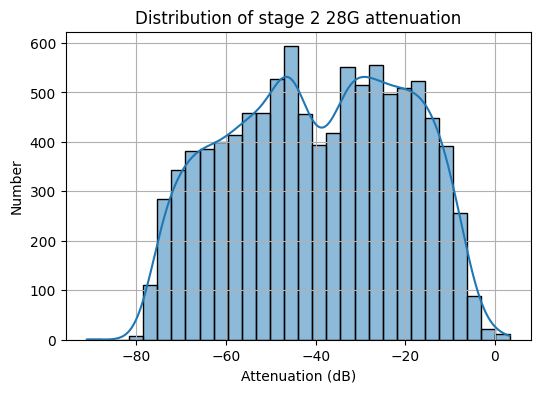

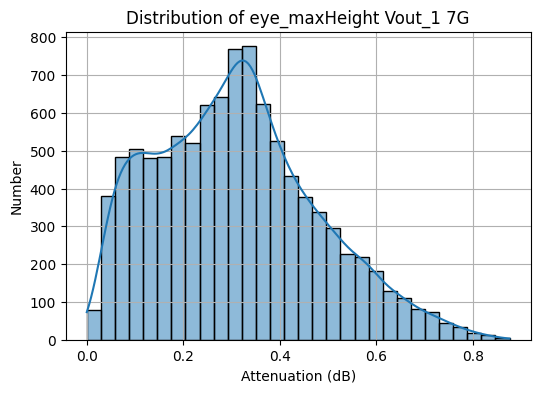

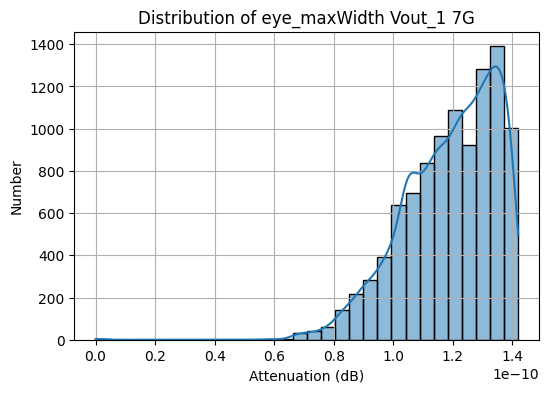

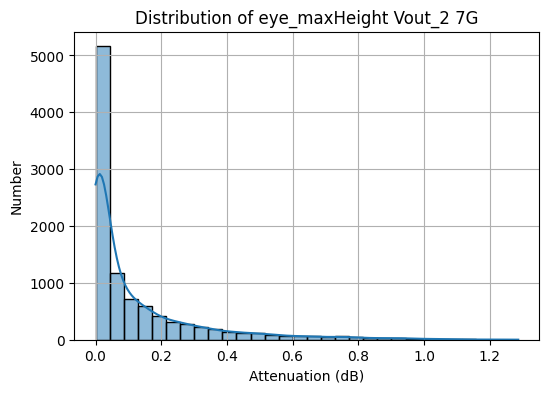

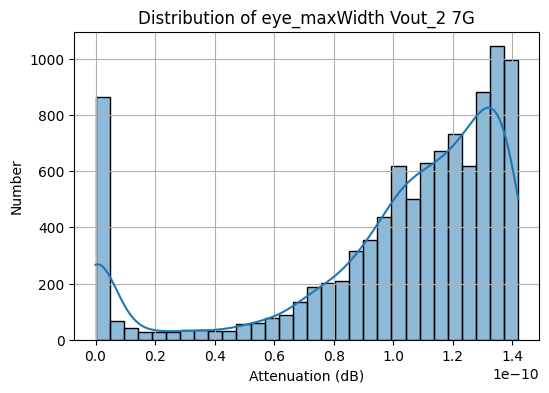

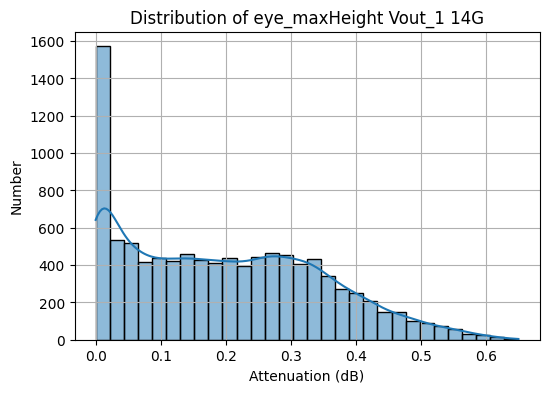

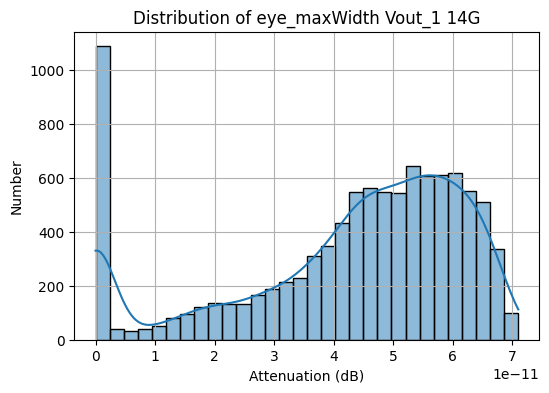

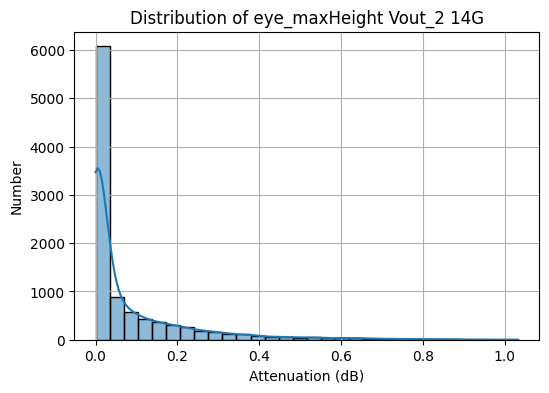

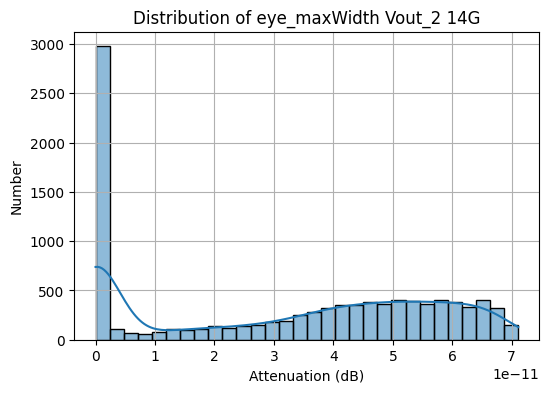

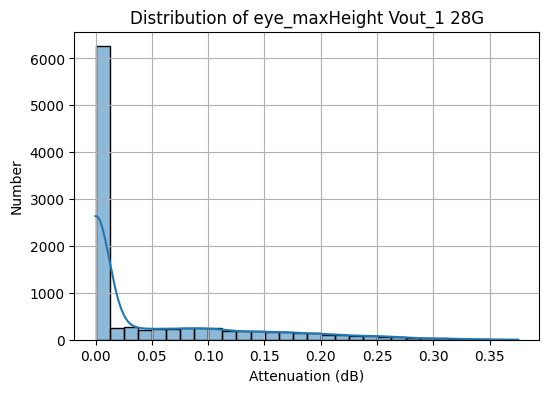

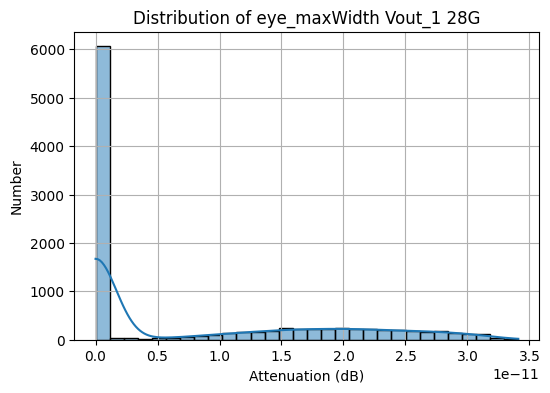

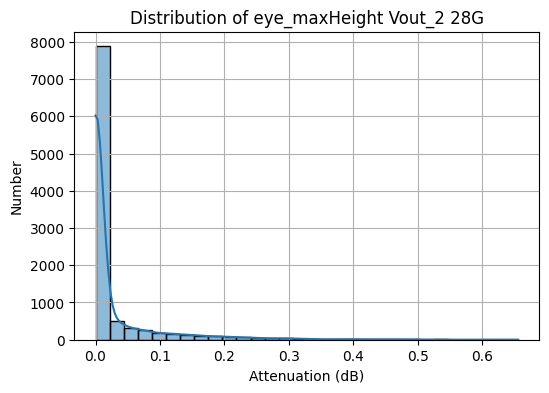

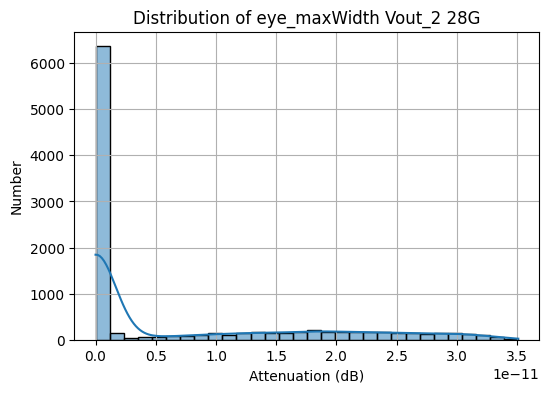

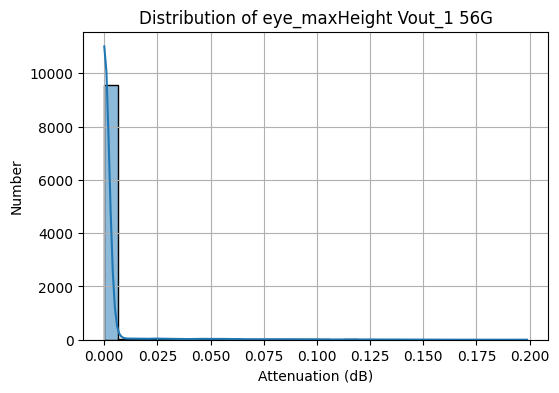

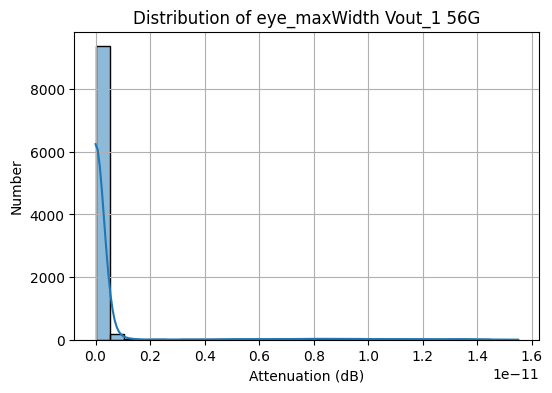

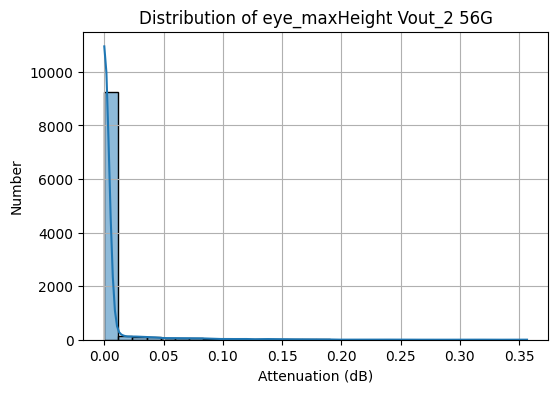

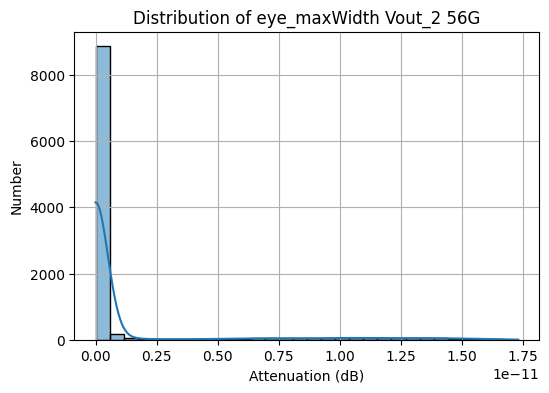

In [8]:
for col in target_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(y[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Attenuation (dB)")
    plt.ylabel("Number")
    plt.grid(True)
    plt.show()

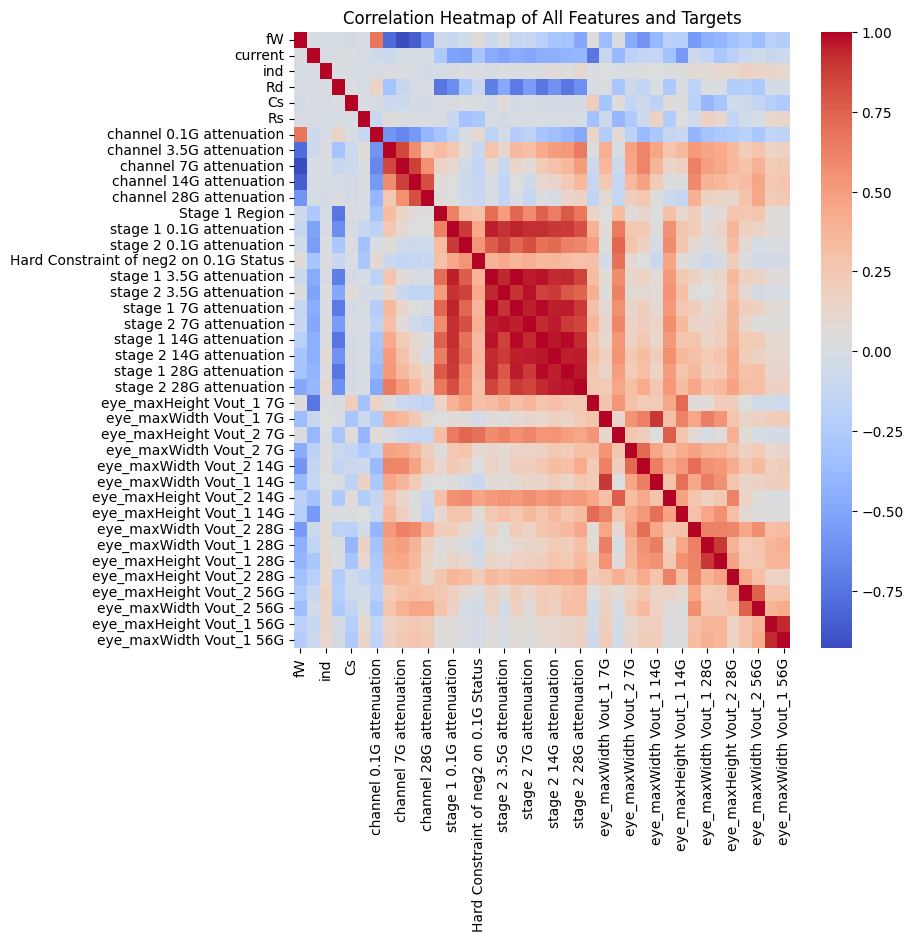

In [9]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap of All Features and Targets")
plt.show()

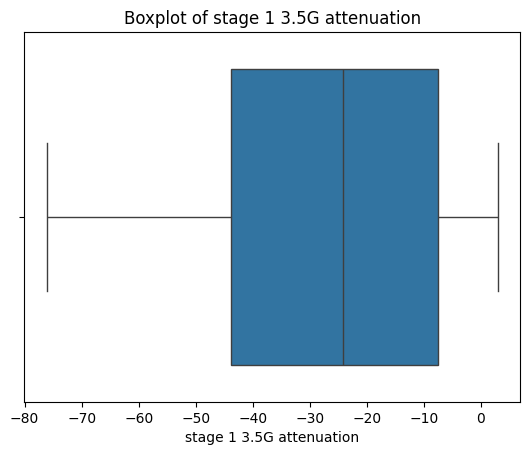

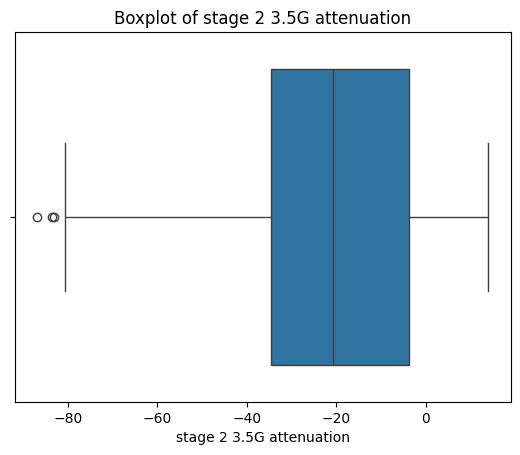

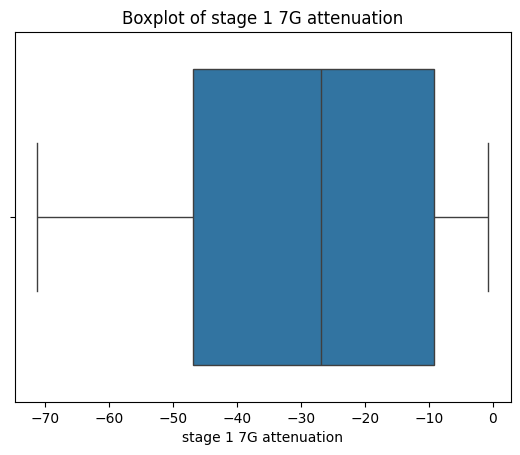

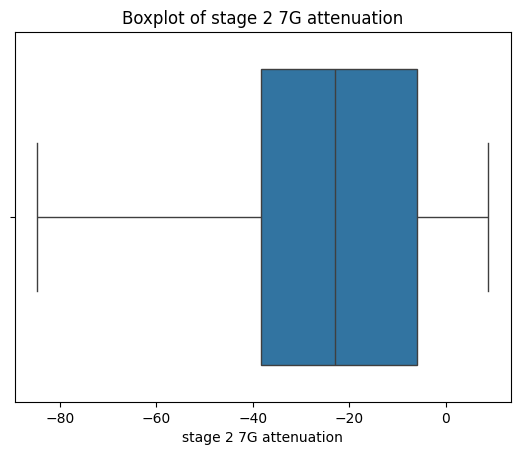

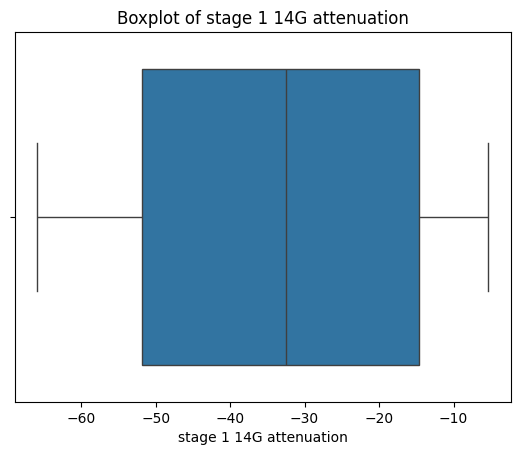

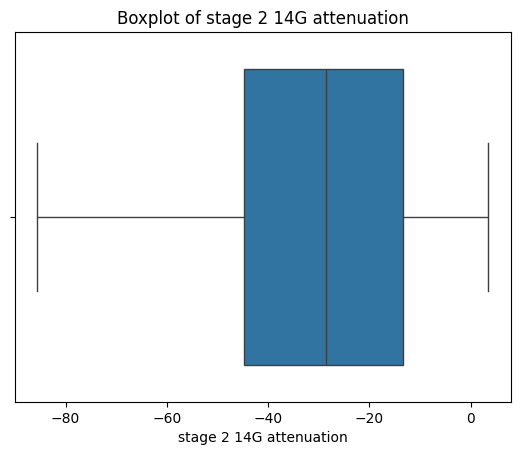

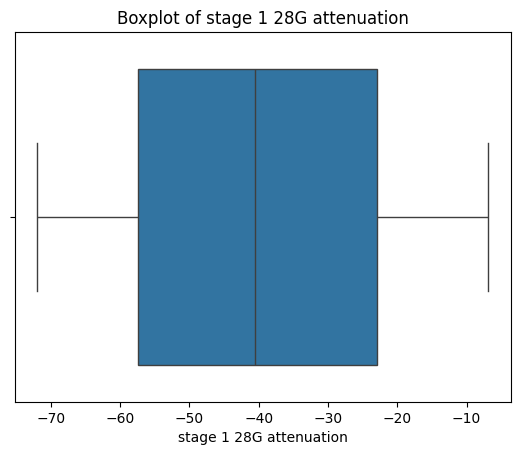

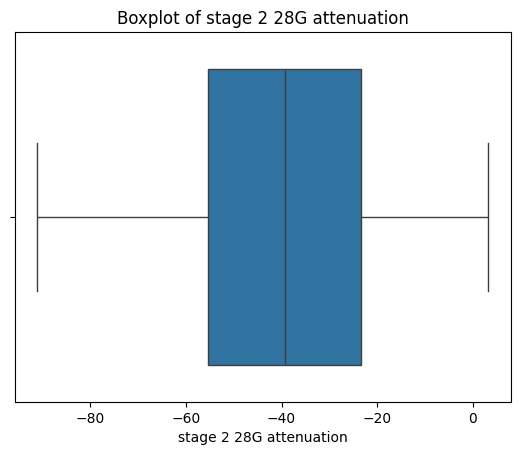

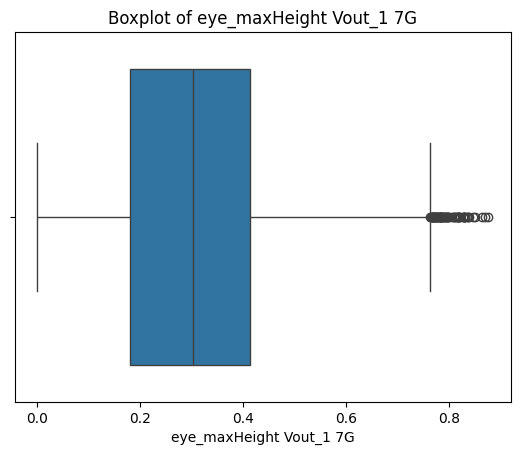

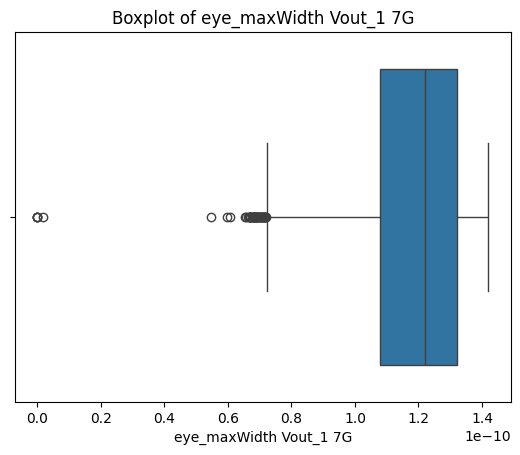

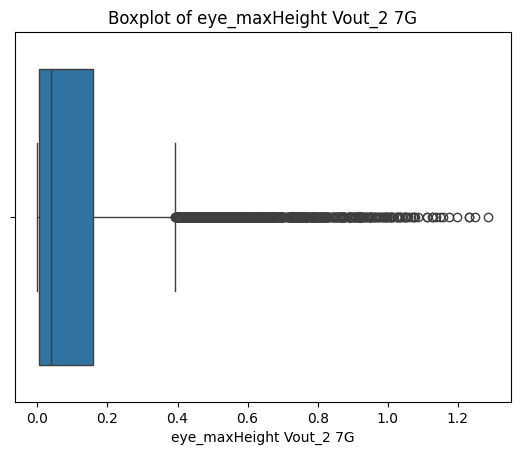

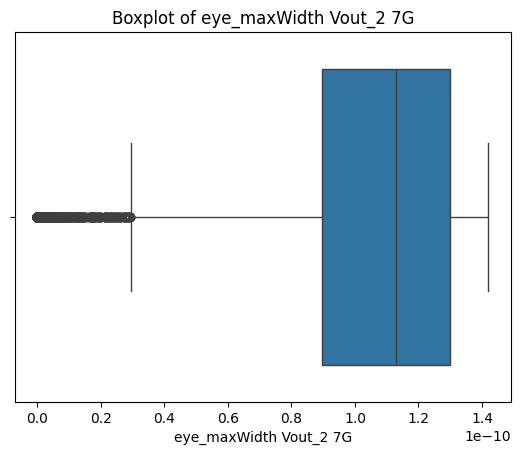

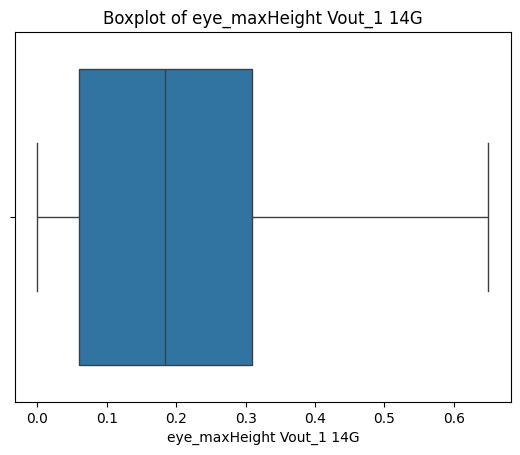

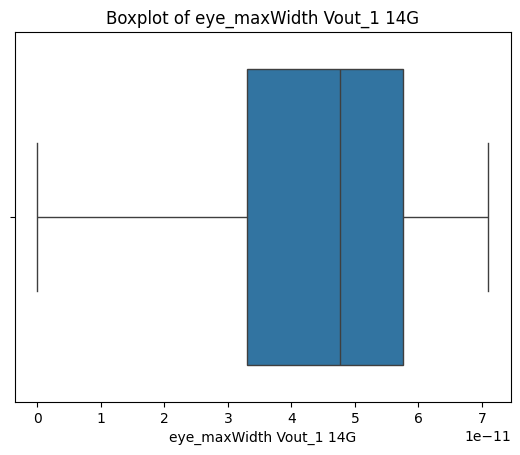

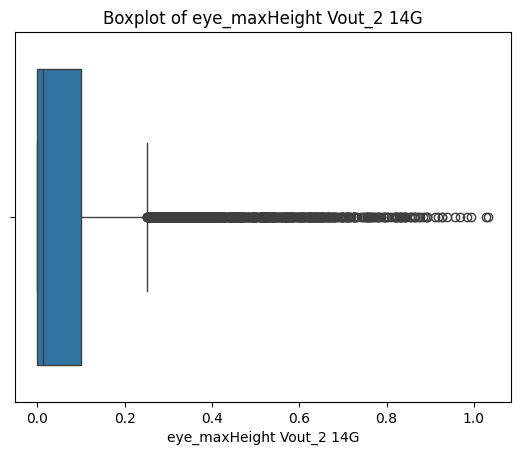

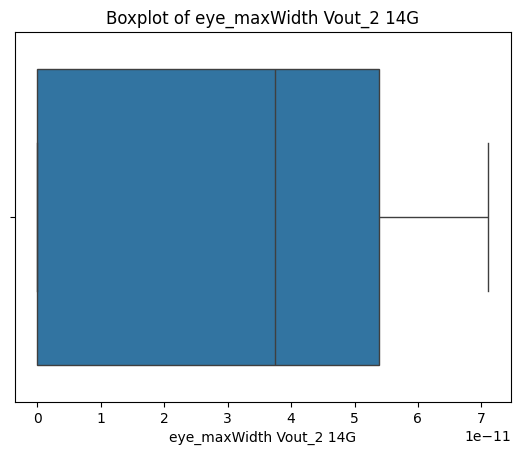

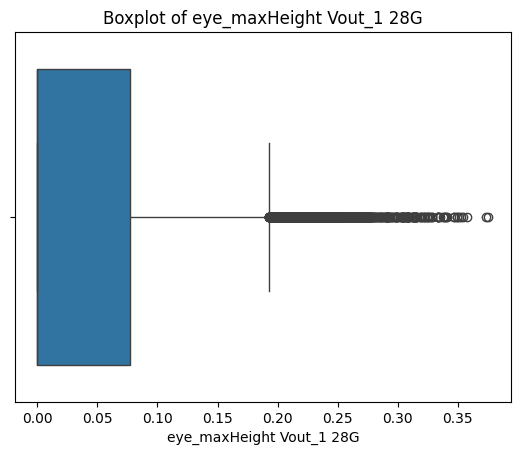

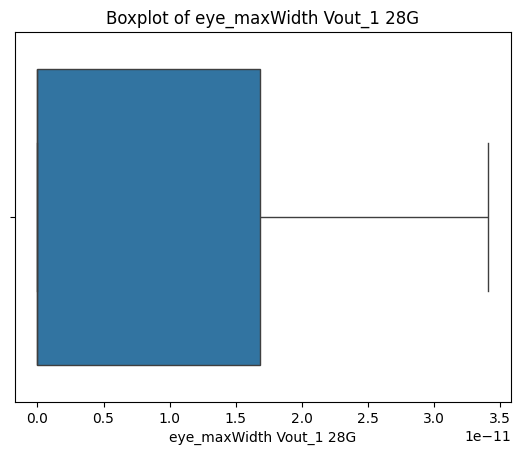

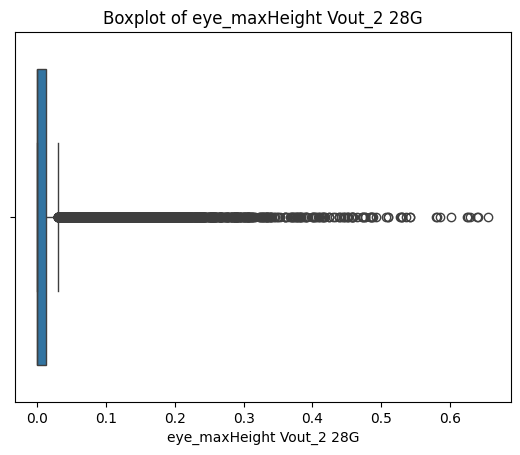

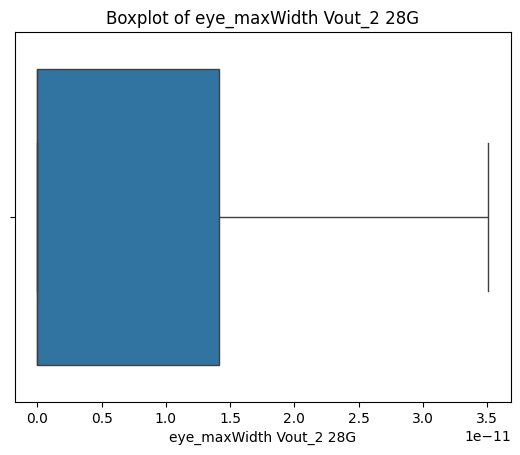

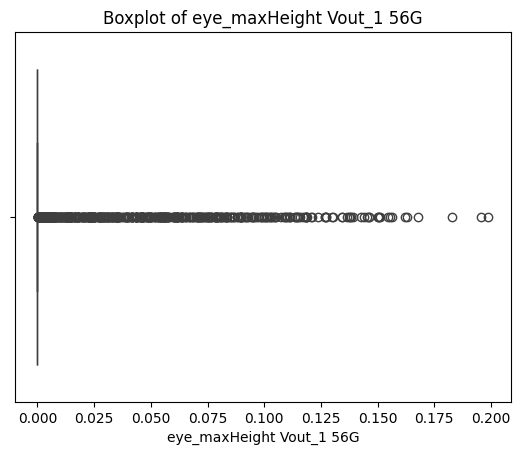

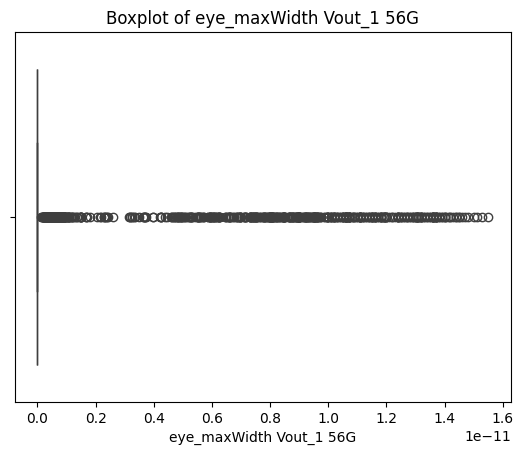

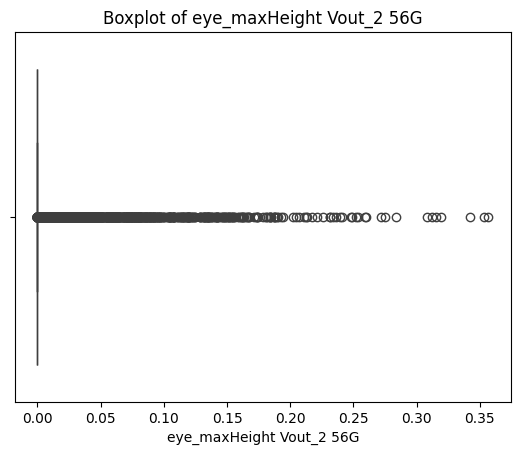

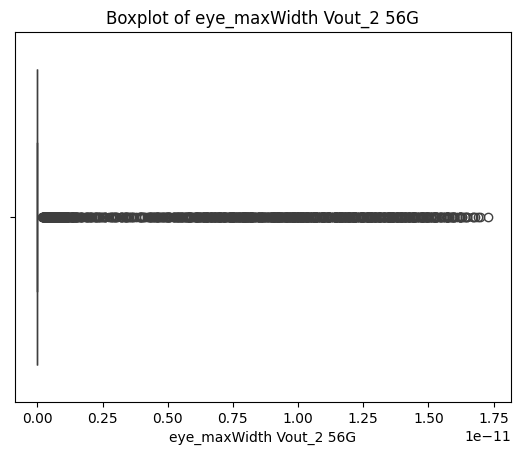

In [10]:
for col in target_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [11]:
# Select only numerical columns for descriptive statistics
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(df[numerical_cols].describe().T)

                                          count          mean           std  \
fW                                      10000.0  5.446573e-06  2.592567e-06   
current                                 10000.0  1.490352e-03  5.762138e-04   
ind                                     10000.0  1.501958e-09  8.673524e-10   
Rd                                      10000.0  7.581668e+02  4.295978e+02   
Cs                                      10000.0  4.984803e-13  2.879899e-13   
Rs                                      10000.0  7.609922e+02  4.290031e+02   
channel 0.1G attenuation                10000.0 -1.967221e-02  7.021575e-05   
channel 3.5G attenuation                10000.0 -6.587107e+00  8.711591e-03   
channel 7G attenuation                  10000.0 -9.090966e+00  1.616999e-02   
channel 14G attenuation                 10000.0 -1.315859e+01  1.697787e-02   
channel 28G attenuation                 10000.0 -1.886394e+01  2.181370e-02   
Stage 1 Region                          10000.0  3.4


Generating Histograms for Numerical Features...


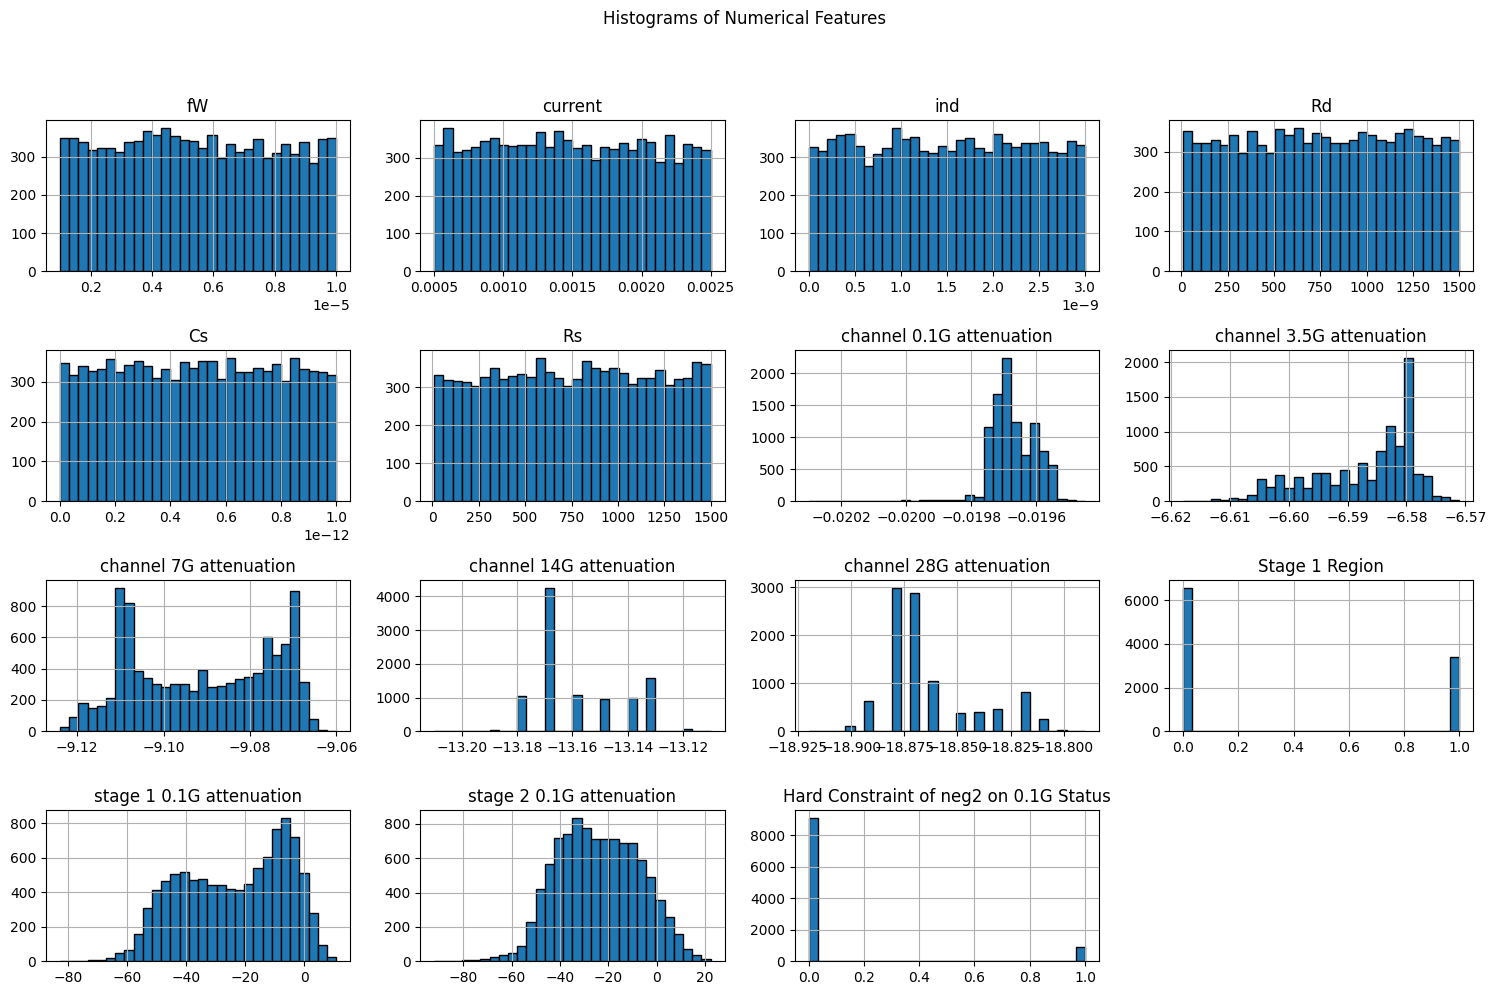

In [12]:
# Visualizations - Histograms for Numerical Features
print("\nGenerating Histograms for Numerical Features...")
# Exclude categorical numerical and target columns from generic histogram plotting
plot_numerical_cols = [
    col
    for col in numerical_cols
    if col not in target_cols
]
df[plot_numerical_cols].hist(bins=30, figsize=(15, 10), edgecolor="black")
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


Generating Box Plots for Numerical Features...


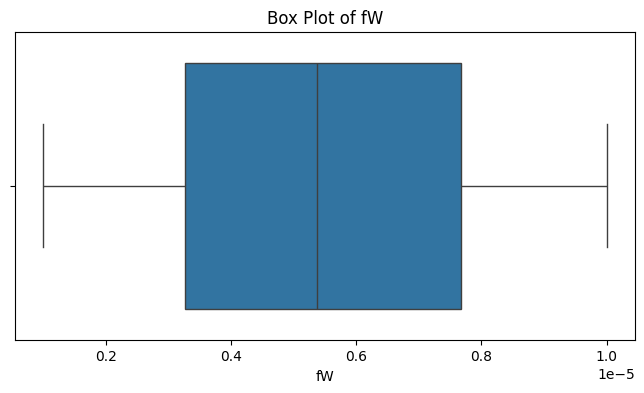

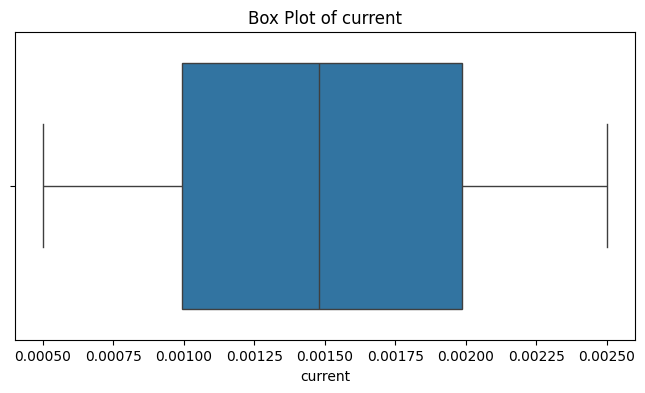

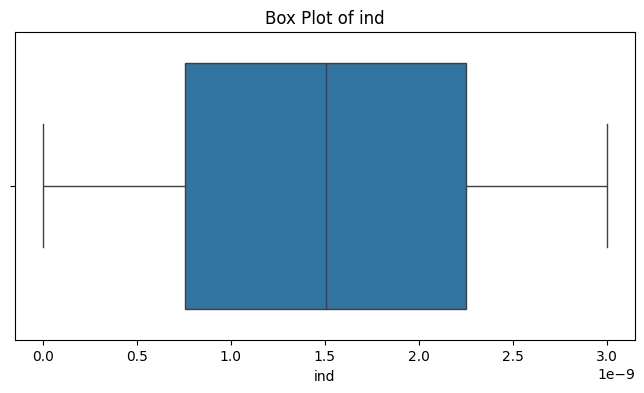

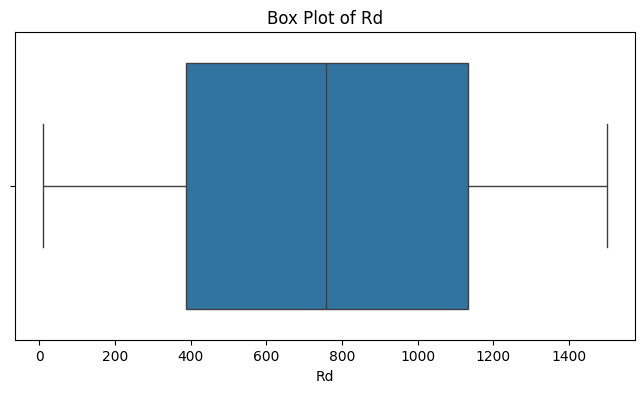

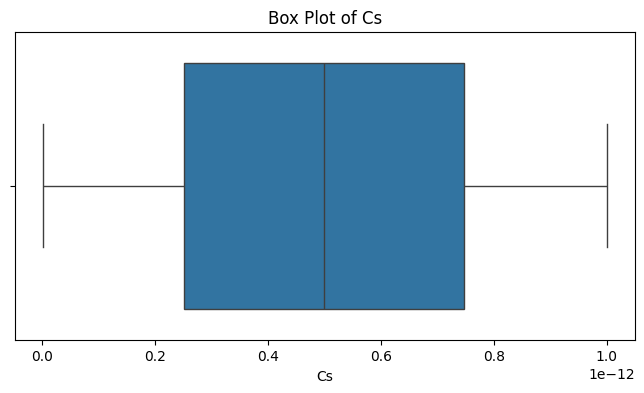

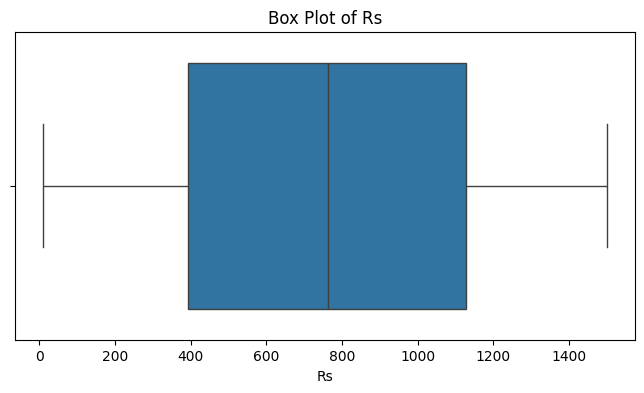

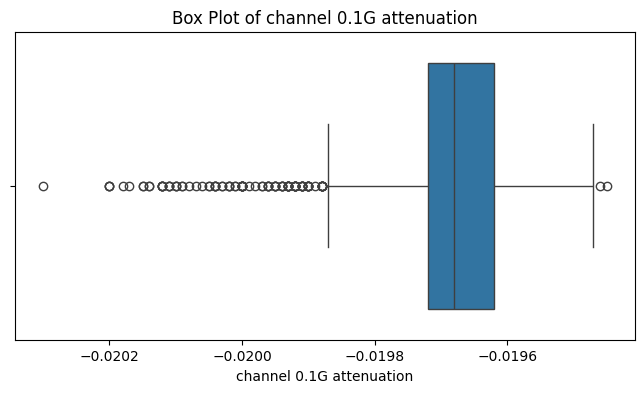

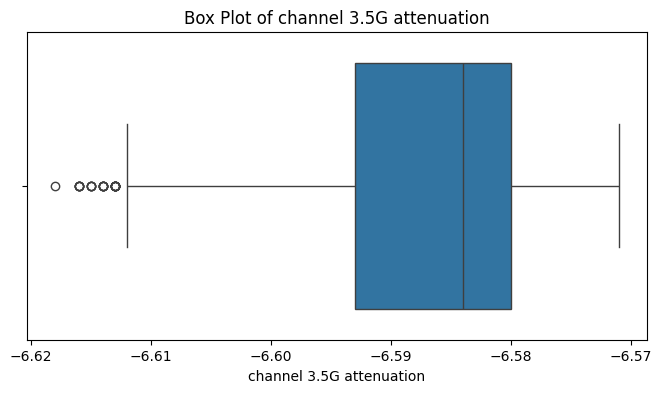

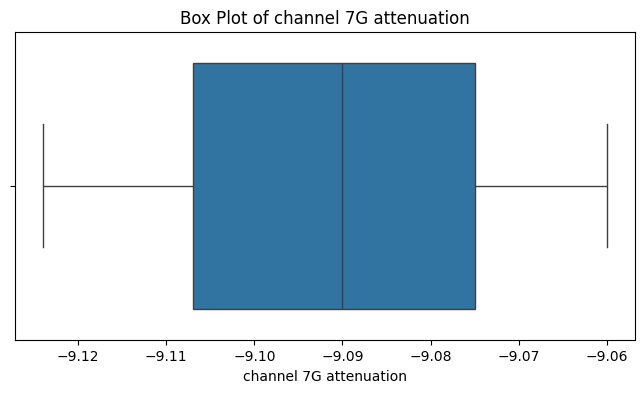

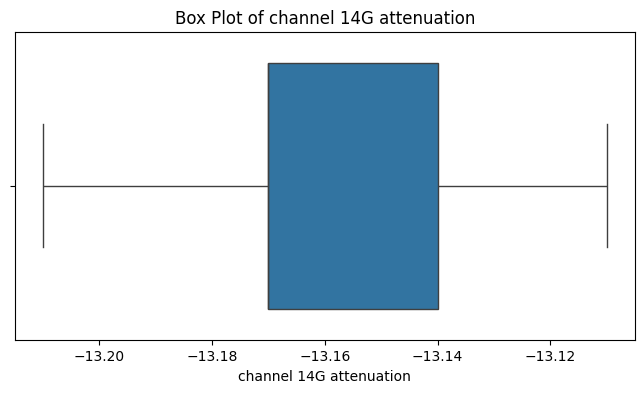

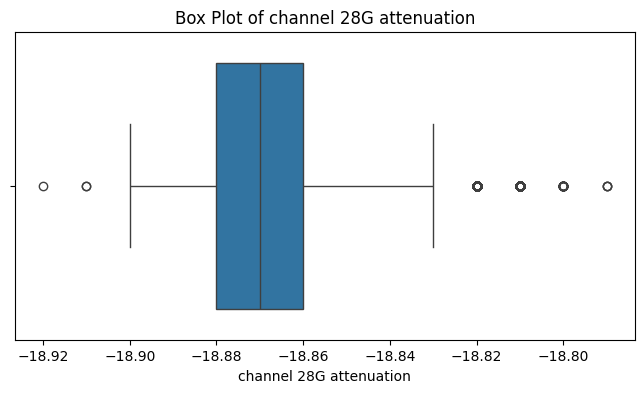

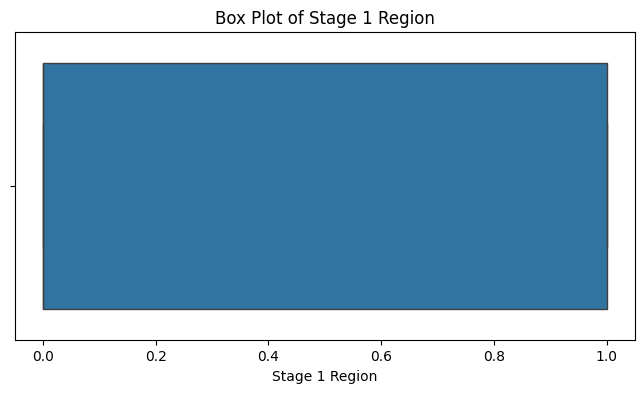

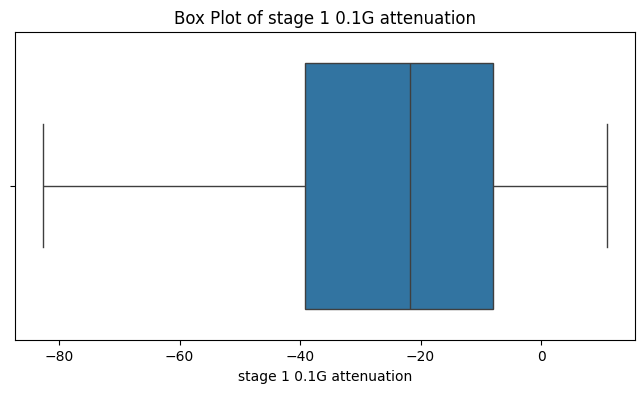

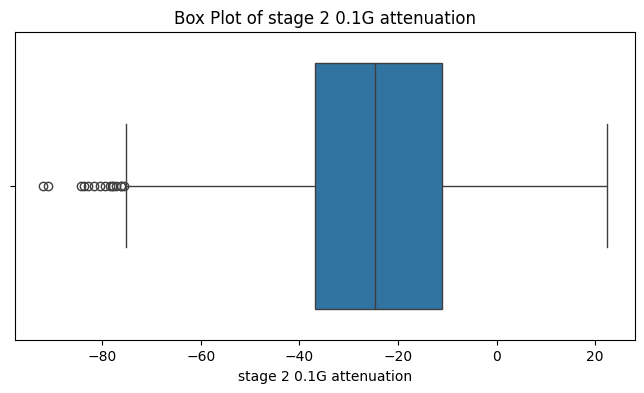

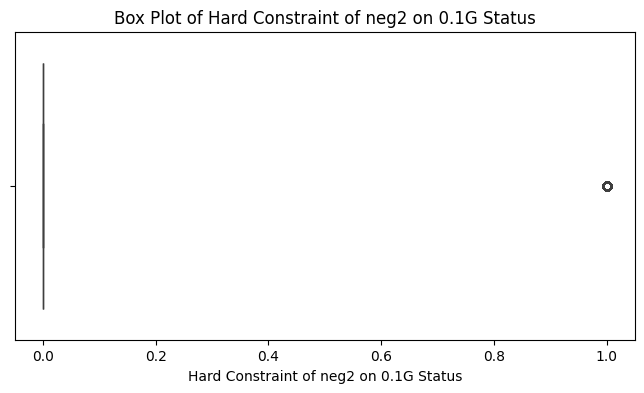

In [13]:
# Visualizations - Box Plots for Numerical Features (for Outlier Detection)
print("\nGenerating Box Plots for Numerical Features...")
for col in plot_numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


Generating Example Scatter Plot ('current' vs. 'stage 1 3.5G attenuation')...


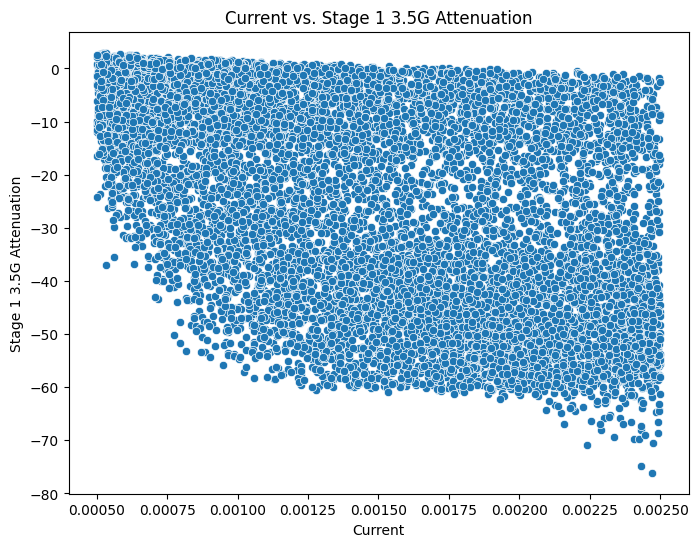

In [14]:
# Scatter Plots (Example: 'current' vs. 'stage 1 3.5G attenuation')
print("\nGenerating Example Scatter Plot ('current' vs. 'stage 1 3.5G attenuation')...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x="current", y="stage 1 3.5G attenuation", data=df)
plt.title("Current vs. Stage 1 3.5G Attenuation")
plt.xlabel("Current")
plt.ylabel("Stage 1 3.5G Attenuation")
plt.show()


Generating Example Grouped Box Plot ('Stage 1 Region' vs. 'stage 1 3.5G attenuation')...


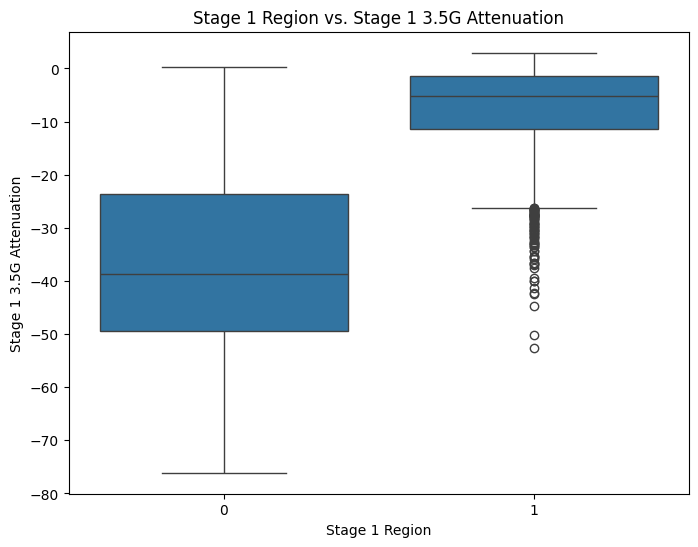

In [15]:
# Grouped Box Plots (Categorical Feature vs. Target - Example: 'Stage 1 Region' vs. 'stage 1 3.5G attenuation')
print(
    "\nGenerating Example Grouped Box Plot ('Stage 1 Region' vs. 'stage 1 3.5G attenuation')..."
)
if "Stage 1 Region" in df.columns and "stage 1 3.5G attenuation" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Stage 1 Region", y="stage 1 3.5G attenuation", data=df)
    plt.title("Stage 1 Region vs. Stage 1 3.5G Attenuation")
    plt.xlabel("Stage 1 Region")
    plt.ylabel("Stage 1 3.5G Attenuation")
    plt.show()
else:
    print(
        "Cannot generate grouped box plot: 'Stage 1 Region' or 'stage 1 3.5G attenuation' not found."
    )